## The Theory behind Gradients

https://www.youtube.com/watch?v=DbeIqrwb_dE<br>

requires_grad is False by default.<br>
When it is set to True PyTorch will calculate a computational graph for the tensor.

In [11]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import seaborn as sns

In [ ]:
data_as_list = [1, 2, 3]
x = torch.tensor(data_as_list, dtype=torch.float16, requires_grad=True)
print(x)

The code below will throw an error because gradients can only be created using floats and complex numbers.

In [ ]:
x = torch.tensor(data_as_list)
print(x)
print(x.dtype)
x = torch.tensor(data_as_list, requires_grad=True)

Mention forward pass, back propagation. Also mention the AddBackward0 function in the grad_fn attribute.

Original tensor: tensor([3., 6., 9.], dtype=torch.float16, requires_grad=True)
x to the power of 2 plus 10: tensor([ 9., 36., 81.], dtype=torch.float16, grad_fn=<PowBackward0>)
tensor([3., 6., 9.], dtype=torch.float16)
tensor([3.6660, 5.6641, 7.6641], dtype=torch.float16)


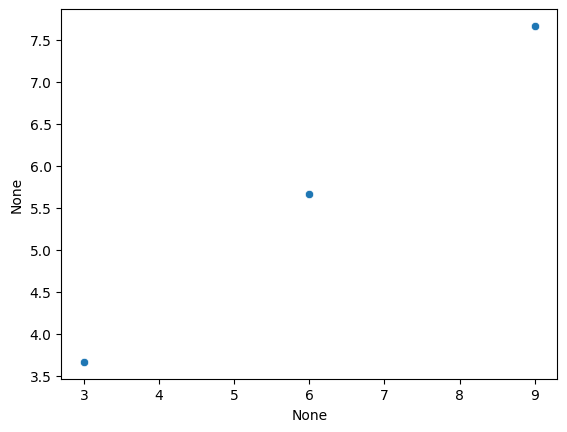

In [13]:
# Setup a tensor with gradients enabled.
data_as_list = [3, 6, 9]
x = torch.tensor(data_as_list, dtype=torch.float16, requires_grad=True)
print('Original tensor:', x)

# Use the exponential operator to create tensor from our original tensor.
a = x**2
print('x to the power of 2 plus 10:', a)

# Create yet another tensor.
b = a + 5*x

# One more
c = b + 9
# For some reason you have to do this.
out = c.mean()

# What we have is y = f(x) = x**2 + 5*x + 9
# dx/dy = 2*x + 5
out.backward()
print(x.detach())
print(x.grad.detach())
#plt.plot(x.detach(), x.grad.detach())
sns.scatterplot(x=x.detach(), y=x.grad.detach())

#v = torch.tensor([4], dtype=torch.float16)
#a.backward(v)
#print('Value for backward pass:', v)
#print('The gradient of x: ', x.grad)
#print(y.grad) # This will produce a warning.

# If you want to rerun this cell then you must zero out the gradients in the original tensor.
_ = x.grad.zero_()

#### A scalar example

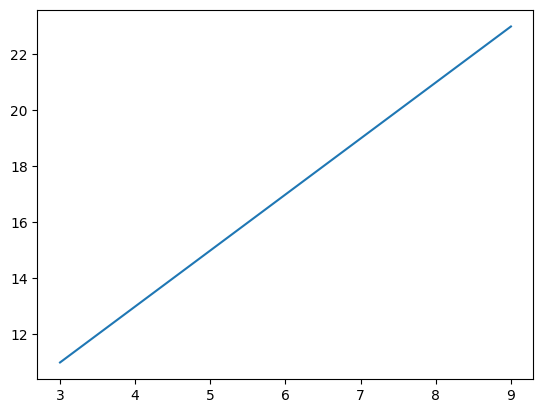

In [10]:
plt.plot([3,6,9], [11,17,23])

In [ ]:
x = torch.tensor([1, 3, 5], dtype=torch.float16, requires_grad=True)
y = 2*x+5
z = x.mean()
print(z)
z.backward()
print(x.grad)
x.grad.zero_()

In [ ]:
z = y*y*2
z

In [ ]:
a = z.mean()
a


To calcualte the gradients call backward() to calcualte the gradient of z with respect to x often written as dz/dx.<br>
Show the error that occurs when requires_grad is set to False and you try to do a backward pass.

In [ ]:
a.backward()
print(x.grad)

In [ ]:
v = torch.tensor([0.1, 0.2, 0.3], dtype=torch.float32)
z.backward(v)
x.grad

In [ ]:
test = torch.randn(3, requires_grad=True)
print(test)

#test.requires_grad_(False) # Trailing underscore means that the variable will be modified in place.
#print(test)

#new = test.detach() # Creates a new tensor.
#print(new)

new1  = test + 2
print(test)
print(new1)

with torch.no_grad():
    new2  = test + 2
    print(test)
    print(new2)



In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    #weights.grad.zero_()

In [ ]:
weights = torch.ones(4, requires_grad=True)

optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad()